In [45]:
import pandas as pd
import numpy as np

In [46]:
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'],
columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

In [47]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [49]:
seed= 999
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .33, stratify = y, random_state = seed)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [] 
cv_scores = [] 

from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 51, 2): 
	neighbors.append(k) 
	knn = KNeighborsClassifier(n_neighbors = k) 
	scores = cross_val_score( 
		knn, Xtrain, ytrain, cv = 10, scoring = 'accuracy') 
	cv_scores.append(scores.mean()) 


The optimal number of neighbors is  11 


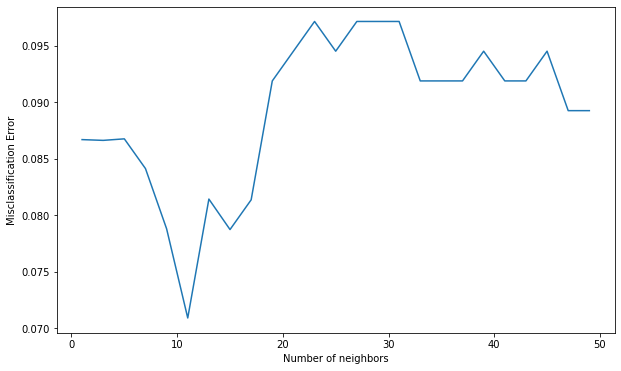

In [51]:
MSE = [1-x for x in cv_scores] 

# determining the best k 
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 

import matplotlib.pyplot as plt 
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

In [52]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(Xtrain, ytrain)

#Predict the response for test dataset
ypred = knn.predict(Xtest)

In [53]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.9468085106382979


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [55]:
gradient_booster.fit(Xtrain,ytrain)
ypred=gradient_booster.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.97      0.99      0.98       118

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [56]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.9787234042553191


In [57]:
# Importing the model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initiating the model:
rf = RandomForestClassifier()

scores = cross_val_score(rf, Xtrain, ytrain, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s " % round(scores*100,2),"%")

The mean accuracy with 10 fold cross validation is 96.05  %


In [58]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
estimator = DecisionTreeClassifier()
rf_tuned_parameters = {"criterion": ['gini', 'entropy'], "max_depth": [10, 20, 50, 100], "min_samples_leaf":
[10, 20, 50]}

In [61]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=50; total time=   0.0s
[CV 2/5] END criterion=gi

[CV 4/5] END criterion=entropy, max_depth=50, min_samples_leaf=50; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=50, min_samples_leaf=50; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=100, min_samples_leaf=10; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=100, min_samples_leaf=10; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=100, min_samples_leaf=10; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=100, min_samples_leaf=10; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=100, min_samples_leaf=10; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=100, min_samples_leaf=20; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=100, min_samples_leaf=20; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=100, min_samples_leaf=20; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=100, min_samples_leaf=20; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=100

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='roc_auc', verbose=5)

In [62]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [63]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	criterion: 'gini'
	max_depth: 10
	min_samples_leaf: 20


In [64]:
print(classification_report(ytest,gradient_booster.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.97      0.99      0.98       118

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [65]:
print(classification_report(ytest,cv_grid.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        70
           1       0.96      0.93      0.95       118

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.93       188
weighted avg       0.94      0.94      0.94       188



Confusion Matrix : 
 [[ 66   4]
 [  8 110]]
Accuracy Score is : 93.62 % 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        70
           1       0.96      0.93      0.95       118

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.93       188
weighted avg       0.94      0.94      0.94       188

AUC-ROC: 0.9375302663438255
LOGLOSS Value is 2.2046


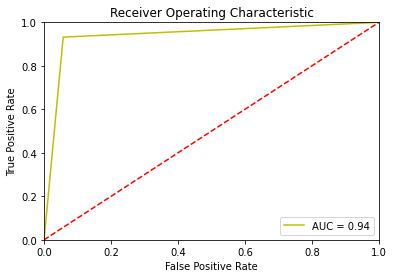

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc

ypred = cv_grid.predict(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(ytest, ypred)
print ('Confusion Matrix : \n', results)
# print ('Accuracy Score is %.4f' % (accuracy_score(ytest, ypred)))
print("Accuracy Score is :",round(accuracy_score(ytest, ypred)*100,2) , "% ")
print ('Classification Report : \n', classification_report(ytest, ypred))
print('AUC-ROC:',roc_auc_score(ytest, ypred))
print('LOGLOSS Value is %.4f' % log_loss(ytest, ypred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# KNN Accuracy:                                   94.68 %
# Gradient_booster Accuracy:                      97.87 %
# Random forest Acuracy:                          96.05  %
# Decision Tree along with GridSearchCV Accuracy: 93.62 % 